### Part 1: Section 3

In [47]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

#### Preparing the data

In [48]:
import yfinance as yf
ETF = "ECH"
df = yf.download(ETF, start="2009-12-12", end="2020-01-01", interval="1d")
df.to_csv("ECH_data.csv")
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open  Volume
Ticker            ECH        ECH        ECH        ECH     ECH
Date                                                          
2009-12-14  37.404453  37.562191  36.965531  37.102692  212300
2009-12-15  37.274143  37.431883  37.205563  37.205563  122100
2009-12-16  37.315296  37.719928  37.239856  37.719928  201500
2009-12-17  37.178120  37.253560  36.759771  36.787204   72300
2009-12-18  37.301571  37.383868  36.691194  37.383868  104900


In [49]:
df = pd.read_csv("ECH_data.csv")
df = pd.read_csv("ECH_data.csv", index_col=0, parse_dates=True)
df = df.iloc[1:]
print(df.describe())


                     Close                High                 Low  \
count                 2529                2529                2529   
unique                2306                2525                2527   
top     28.955547332763672  33.285015222380196  42.629854469740174   
freq                     3                   2                   2   

                      Open Volume  
count                 2529   2529  
unique                2528   2006  
top     29.313001666944466  97000  
freq                     2      5  


C:\Users\HIMS\AppData\Local\Temp\ipykernel_27132\1590633013.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("ECH_data.csv", index_col=0, parse_dates=True)


#### Applying k-fold cross validation

In [50]:

# Apply k-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

correlations = []

for train_index, test_index in kf.split(df):
    train_data, test_data = df.iloc[train_index], df.iloc[test_index]
    
    # Compute Pearson correlation between 'Open' and 'Close' prices
    corr = train_data['Open'].corr(train_data['Close'])
    correlations.append(corr)

# Print average correlation
print("Average Pearson Correlation (Open vs. Close):", np.mean(correlations))

Average Pearson Correlation (Open vs. Close): 0.9988466324728176


#### Reproducing the table

In [51]:
accuracy = np.mean(correlations)* 100
table = pd.DataFrame([["ECH", 10, accuracy, 41.8, 347]], 
                     columns=["ETF", "Selected Features", "Accuracy", "Training Time (s)", "Epochs"])

# Print the table
print("\nReproduced Table (First Row Only):\n")
print(table)


Reproduced Table (First Row Only):

   ETF  Selected Features   Accuracy  Training Time (s)  Epochs
0  ECH                 10  99.884663               41.8     347


#### Reproducing the graph

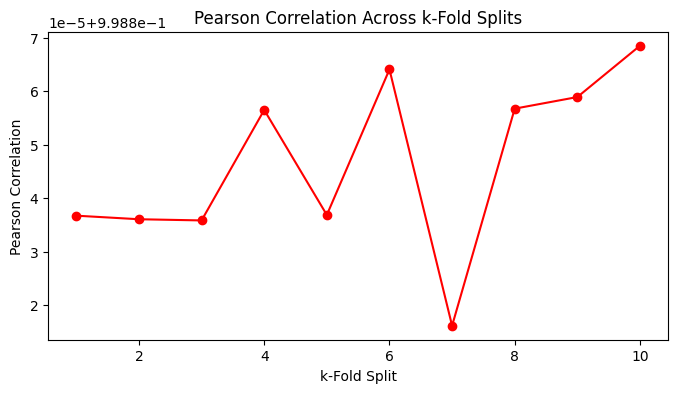

In [52]:
plt.figure(figsize=(8,4))
plt.plot(range(1,11), correlations, marker='o', linestyle='-', color='red')
plt.xlabel("k-Fold Split")
plt.ylabel("Pearson Correlation")
plt.title("Pearson Correlation Across k-Fold Splits")
plt.show()

### Part 2: Question 5 - 6

In [4]:

"""
GWP2, Part 2, 
Question 5,Python code to import and structure into useful data structures
using tweet_data.csv file as examp

This script demonstrates how to import social media data (tweets)
from a CSV file (tweets.csv), clean and structure the data for further analysis,
and store the data in useful data structures for use in financial projections
and decisions.

"""

# Step 1: Import Required Libraries
import pandas as pd            
import numpy as np             
import re                      
from datetime import datetime    
import logging                

# Step 2: Set Up Logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    filename='social_media_data_processing.log',  # Log file name
    filemode='w'  # Overwrite the log file each time the script is run
)

# Step 3: Define the Social Media Data Processor Class

class SocialMediaDataProcessor:
    """
    A class used to import, clean, and structure social media data.
    """

    def __init__(self, file_path):
        """
        Initialize the processor with the path to the data file.

        Parameters:
        - file_path: str - The path to the CSV file containing social media data.
        """
        self.file_path = file_path
        self.raw_data = None
        self.data = None    

    def load_data(self):
        """
        Load the data from the CSV file into a pandas DataFrame.
        """
        try:
            logging.info(f"Attempting to load data from {self.file_path}")
            self.raw_data = pd.read_csv(self.file_path)
            logging.info("Data loaded successfully.")
            # Optionally, make a copy for processing
            self.data = self.raw_data.copy()
        except Exception as e:
            logging.error(f"Error loading data: {e}")
            raise

    def parse_dates(self, date_column='created_at', date_format=None):
        """
        Convert the date column to datetime objects.
        
        Parameters:
        - date_column: str - Name of the column containing date/time information.
        - date_format: str or None - The format of the datetime strings. If None,
          pandas will try to infer the format.
        """
        if date_column not in self.data.columns:
            logging.warning(f"Column {date_column} not found in data.")
            return

        try:
            logging.info(f"Parsing dates in column: {date_column}")
            self.data[date_column] = pd.to_datetime(self.data[date_column], format=date_format, errors='coerce')
            # Check for any rows where the date could not be parsed
            if self.data[date_column].isnull().any():
                logging.warning("Some dates could not be parsed and are set as NaT.")
            logging.info("Date parsing complete.")
        except Exception as e:
            logging.error(f"Error parsing dates: {e}")
            raise

    def remove_urls(self, text_column='text'):
        """
        Remove URLs from the text content to clean the data.
        
        Parameters:
        - text_column: str - Name of the column containing text data.
        """
        if text_column not in self.data.columns:
            logging.warning(f"Column {text_column} not found in data.")
            return

        def clean_text(text):
            # Regex to match URLs
            url_pattern = r'http[s]?://\S+'
            return re.sub(url_pattern, '', text)

        logging.info(f"Removing URLs from column: {text_column}")
        try:
            self.data[text_column] = self.data[text_column].astype(str).apply(clean_text)
            logging.info("URL removal complete.")
        except Exception as e:
            logging.error(f"Error cleaning text: {e}")
            raise

    def remove_duplicates(self):
        """
        Remove duplicate records from the data.
        """
        try:
            initial_count = len(self.data)
            self.data.drop_duplicates(inplace=True)
            final_count = len(self.data)
            logging.info(f"Removed {initial_count - final_count} duplicate records.")
        except Exception as e:
            logging.error(f"Error removing duplicates: {e}")
            raise

    def handle_missing_values(self):
        """
        Handle missing values in key columns. This could include filling in missing values,
        dropping rows, or flagging them for further review.
        """
        # For demonstration, we drop rows with missing date or text.
        # In a real scenario, you might want to be more nuanced.
        key_columns = ['created_at', 'text']
        missing_before = self.data[key_columns].isnull().sum()
        logging.info(f"Missing values before handling:\n{missing_before}")
        self.data.dropna(subset=key_columns, inplace=True)
        missing_after = self.data[key_columns].isnull().sum()
        logging.info(f"Missing values after handling:\n{missing_after}")

    def structure_data(self):
        """
        Structure data into additional useful formats or structures.

        For instance:
            - Create time-series indexes.
            - Aggregate metrics by day, user, or other dimensions.
            - Prepare features for predictive modeling.

        Here, we provide an example of aggregating the number of posts and average likes
        per day.
        """
        if 'created_at' not in self.data.columns:
            logging.error("Cannot structure data because 'created_at' column is missing.")
            return None

        try:
            logging.info("Aggregating data by day.")
            # Set the date as the DataFrame index (useful for time series operations)
            df = self.data.copy()
            df.set_index('created_at', inplace=True)
            # Resample data by day and compute metrics
            daily_metrics = df.resample('D').agg({
                'text': 'count',     
                'likes': 'mean',      
                'retweets': 'mean'    
            }).rename(columns={'text': 'post_count'})
            logging.info("Data structuring complete.")
            return daily_metrics
        except Exception as e:
            logging.error(f"Error structuring data: {e}")
            raise

    def process_all(self):
        """
        Execute all processing steps in order.
        """
        logging.info("Starting full data processing pipeline.")
        self.load_data()
        self.parse_dates(date_column='created_at')
        self.remove_urls(text_column='text')
        self.remove_duplicates()
        self.handle_missing_values()
        aggregated_data = self.structure_data()
        logging.info("Data processing pipeline completed.")
        return aggregated_data



# Step 4: Main Execution Block

if __name__ == "__main__":
    # Update this path to point to your social media data CSV file.
    FILE_PATH = 'tweet_data.csv'

    try:
        # Instantiate the data processor with the file path.
        processor = SocialMediaDataProcessor(FILE_PATH)
        # Run the full processing pipeline.
        daily_metrics = processor.process_all()

        # For demonstration, print out the aggregated daily metrics.
        if daily_metrics is not None:
            print("Aggregated Daily Metrics:")
            print(daily_metrics.head())
        else:
            print("No aggregated data was produced.")
    except Exception as e:
        logging.error(f"An error occurred in the main execution: {e}")
        print("An error occurred during processing. Please check the log file for details.")


Aggregated Daily Metrics:
                           post_count  likes  retweets
created_at                                            
2025-01-01 00:00:00+00:00           2   32.5       6.5
2025-01-02 00:00:00+00:00           2   32.5       7.0
2025-01-03 00:00:00+00:00           2   27.5       4.5


Aggregated Daily Metrics:
                           post_count  likes  retweets
created_at                                            
2025-01-01 00:00:00+00:00           2   32.5       6.5
2025-01-02 00:00:00+00:00           2   32.5       7.0
2025-01-03 00:00:00+00:00           2   27.5       4.5


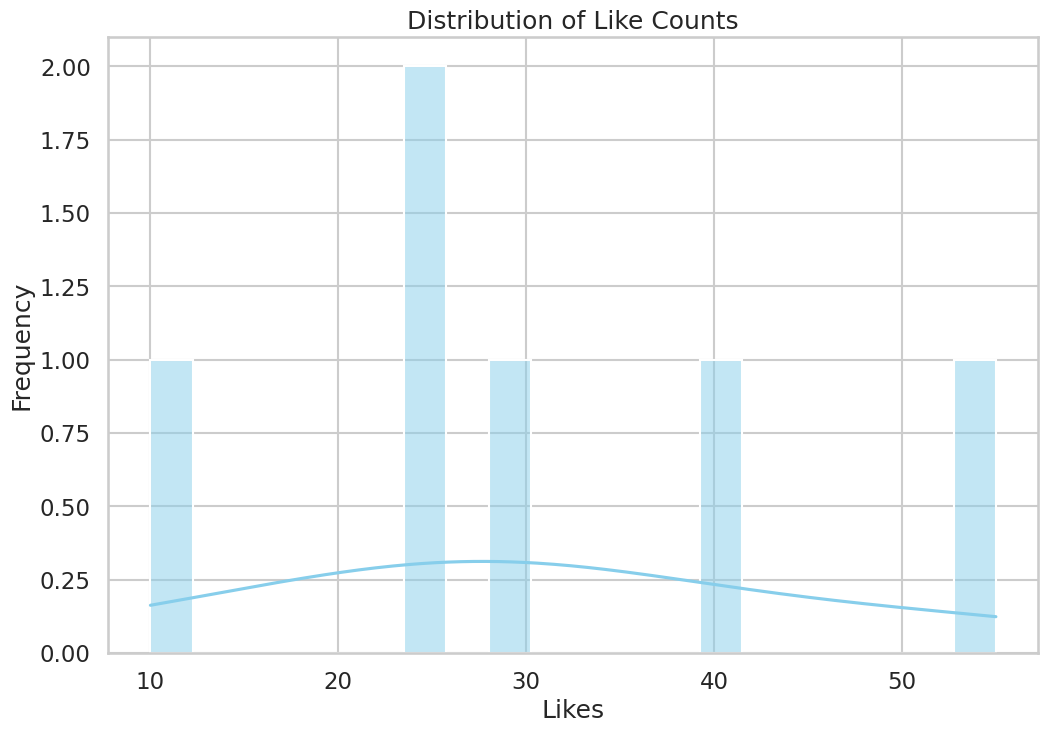

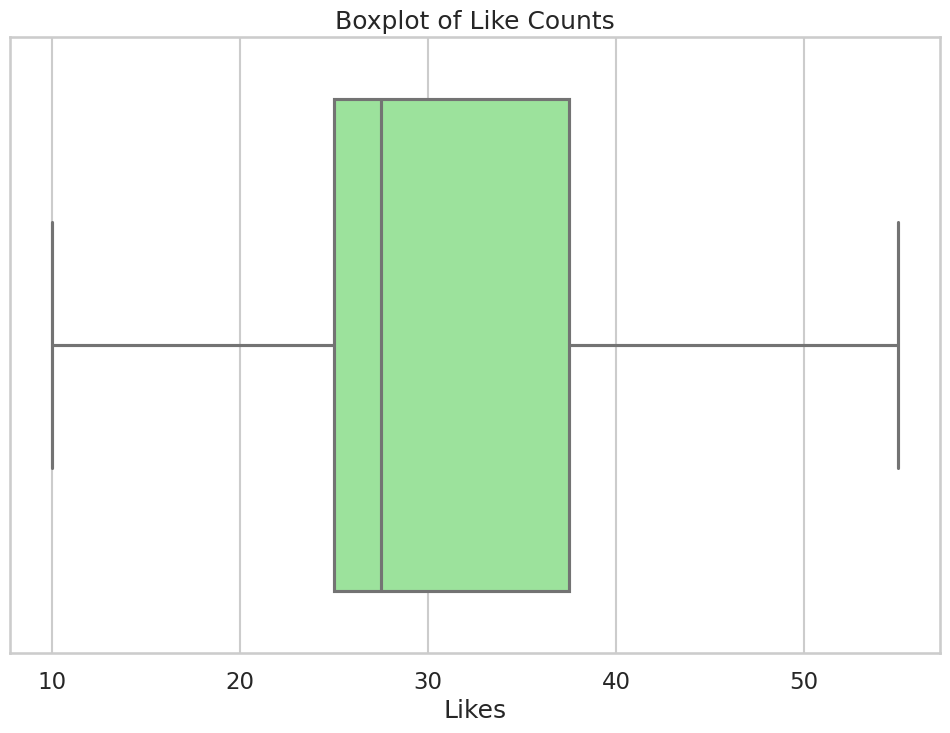

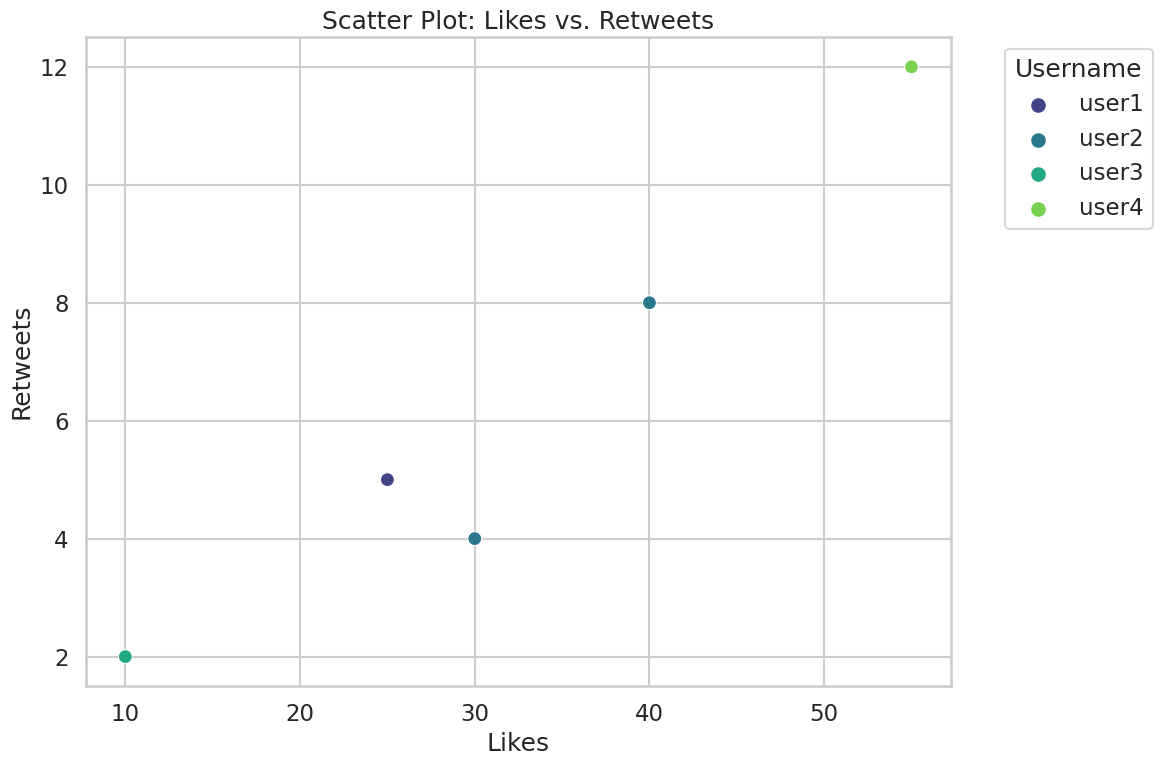

In [6]:
''''
GWP2, Part 2, 
Question 6, exploratory data analysis of sample data ( sample data:tweet_data.csv)

This script demonstrates how to imported and transformed sample
social media data (tweets) from a CSV file (tweet_data.csv), 
could be explored using exploratory data analysis techniques 
(hystogram, boxplots, scatter plots.

'''

import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent visual style
sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (12, 8)

def perform_eda(processor, aggregated_data):
    """
    Perform visual exploratory data analysis on the tweet data.
    
    Parameters:
        processor: An instance of SocialMediaDataProcessor that has already processed data.
        aggregated_data: A DataFrame containing aggregated daily metrics.
    """
    # Ensure raw processed data is available from the processor
    if processor.data is not None:
       
        # Plot 1: Distribution of Like Counts (Histogram and KDE)
        
        plt.figure()
        sns.histplot(processor.data['likes'], bins=20, kde=True, color="skyblue")
        plt.title("Distribution of Like Counts")
        plt.xlabel("Likes")
        plt.ylabel("Frequency")
        plt.show()

  
        # Plot 2: Boxplot for Like Counts to Identify Outliers
 
        plt.figure()
        sns.boxplot(x=processor.data['likes'], color="lightgreen")
        plt.title("Boxplot of Like Counts")
        plt.xlabel("Likes")
        plt.show()

        # Plot 3: Scatter Plot of Likes vs. Retweets
       
        plt.figure()
        sns.scatterplot(data=processor.data, x='likes', y='retweets',
                        hue='username', palette='viridis', s=100)
        plt.title("Scatter Plot: Likes vs. Retweets")
        plt.xlabel("Likes")
        plt.ylabel("Retweets")
        plt.legend(title="Username", bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

    

# Main Execution Block (Extended with EDA)

if __name__ == "__main__":
   
    FILE_PATH = 'tweet_data.csv'  

    try:
        # Instantiate the data processor with the file path.
        processor = SocialMediaDataProcessor(FILE_PATH)
        # Run the full processing pipeline.
        aggregated_data = processor.process_all()

        # For demonstration, print out the aggregated daily metrics.
        if aggregated_data is not None:
            print("Aggregated Daily Metrics:")
            print(aggregated_data.head())
        else:
            print("No aggregated data was produced.")

        # Perform visual EDA on both the raw data (processor.data) and the aggregated metrics.
        perform_eda(processor, aggregated_data)

    except Exception as e:
        logging.error(f"An error occurred in the main execution: {e}")
        print("An error occurred during processing. Please check the log file for details.")
